# 1. Load data and import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.corpus import stopwords

In [2]:
df_1 = pd.read_csv('./../Data/Dataframes/dataframe_Condorcet_1.csv')
df_2 = pd.read_csv('./../Data/Dataframes/dataframe_Condorcet_2.csv')

In [3]:
df_1.head(2)

,Savant,Auteur,Annee,Eloge
0,de la Chambre,Condorcet,1773,"[Condorcet avait mis, en marge de cette premiè..."
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou..."


In [4]:
df_2.head(2)

,Savant,Auteur,Annee,Eloge
0,Euler,Condorcet,1783,"Léonard Euler, directeur de la classe de mathé..."
1,Bézout,Condorcet,1783,"Étienne Bézout, de l’Académie des sciences et ..."


In [5]:
df = pd.concat([df_1, df_2], ignore_index = True)

In [6]:
df.shape

(66, 4)

In [7]:
df_1.shape

(39, 4)

In [8]:
df_2.shape

(27, 4)

In [9]:
39+27

66

# 2. Exploring

<AxesSubplot:>

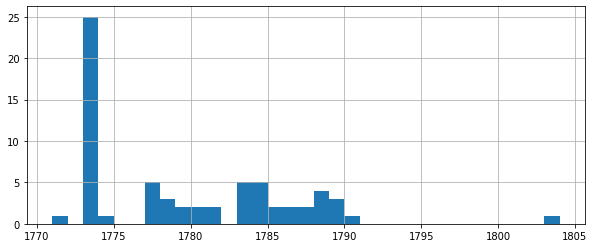

In [10]:
bins = max(df['Annee'])-min(df['Annee'])
df['Annee'].hist(bins = bins, figsize = (10,4))

In [11]:
df[df['Annee']<1776].shape

(27, 4)

In [12]:
df[df['Annee']>1793].shape

(1, 4)

In [13]:
df[df['Annee']>1793]

,Savant,Auteur,Annee,Eloge
62,de Fourcroy,Condorcet,1804,"Charles-René de Fourcroy, maréchal de camp, gr..."


Condorcet a été secrétaire de 1776 à 1793

Il a écrit 28 éloges sans être secrétaire perpétuel

De plus une fut publiée à titre posthume 

TODO ajouter lien 

# 3. Pre-processing

## a. Removing side-information whithin brackets

Some eulogies start with a side note, that is not part of the eulogy per say but provides some information

In [15]:
df['Side_Info'] = df['Eloge'].apply(lambda x : '[' in x)
df[df['Side_Info']].shape

(19, 5)

In [16]:
df[df['Side_Info']]

,Savant,Auteur,Annee,Eloge,Side_Info
0,de la Chambre,Condorcet,1773,"[Condorcet avait mis, en marge de cette premiè...",True
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...",True
2,Picard,Condorcet,1773,[Voyez sur Picard l’Histoire céleste. Il a sou...,True
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",True
5,Blondel,Condorcet,1773,"François Blondel naquit à Ribemont, en Picardi...",True
6,Huygens,Condorcet,1773,"Christian Huygens naquit à la Haye, le 14 avri...",True
8,Roëmer,Condorcet,1773,"[Voyez le Recueil des œuvres de Leibniz, par M...",True
23,Le Seur,Condorcet,1773,"[Condorcet écrivait à Voltaire, le 16 février ...",True
25,Fontaine,Condorcet,1771,Alexis Fontaine naquit à Claveison en Dauphiné...,True
26,de La Condamine,Condorcet,1774,"Charles-Marie de La Condamine, pensionnaire ch...",True


In [17]:
re.findall('\[(.*?)\]', df.loc[0, 'Eloge'])

['Condorcet avait mis, en marge de cette première partie des Éloges, quelques indications des corrections ou des développements qu’il avait le projet d’y faire. Nous les avons précieusement conservées : elles donnent une idée de sa manière de travailler, et sa simplicité, sa candeur, son amour pour la vérité s’y montrent à chaque mot. (Note des premiers éditeurs.)',
 'Expliquer pourquoi ces assertions ne parurent point impies.',
 'Sur ses expériences et sa querelle avec Torricelli, voir la Vie de Torricelli, par l’abbé Fabrini; et sur ses démêlés avec Descartes, voir la Vie de Descartes, par Baillet',
 'Roberval ayant fait exécuter une machine, elle ne produisit pas l’effet qu’il en attendait : étonné de son erreur, il regardait la machine avec colère : Voyez, dit Mariotte, M. de Roberval, qui dit des injures à la nature, parce qu’elle ne veut pas s’accorder aux les lois de sa géométrie']

In [18]:
df['Side_Info'] = df['Eloge'].apply(lambda x : re.findall('\[(.*?)\]', x))

In [19]:
re.sub('\[(.*?)\]','', df.loc[0, 'Eloge'])

" \\n Marin Cureau de la Chambre, médecin ordinaire du roi, naquit au Mans vers 1613. Le chancelier Séguier se l’attacha, moins pour son habileté dans la médecine, que pour l’étendue et la variété de Ses connaissances. La confiance de ce ministre fournissait à la Chambre le moyen d’être utile aux gens de lettres, et il en saisissait avidement toutes les occasions. Il était bien éloigné de dédaigner les Sciences après avoir fait fortune par elles : espèce d’ingratitude qui n’est malheureusement que trop commune. Le cardinal de Richelieu lui donna une place dans l’Académie française, lors de Son établissement en 1635, et le chargea, en 1640, de répondre au livre de Hersant, en faveur des prétentions de la cour de Rome. Ce livre fut regardé en France comme séditieux, et l’on ordonna des recherches contre l’auteur, qui chercha un asile auprès de ceux dont il avait défendu la cause ; mais à Rome même il fut poursuivi par l’inquisition, comme janséniste, et excommunié pour n’avoir point comp

In [20]:
df['Eloge'] = df['Eloge'].apply(lambda x : re.sub('\[(.*?)\]','', x))

## b. Removing \n, \t, non useful spaces

In [21]:
df['Eloge'] = df['Eloge'].apply(lambda x : x.replace("\\n", "").replace("\\t", "").replace("\n", "").replace("\t", "")
                               .strip())

In [22]:
df

,Savant,Auteur,Annee,Eloge,Side_Info
0,de la Chambre,Condorcet,1773,"Marin Cureau de la Chambre, médecin ordinaire ...","[Condorcet avait mis, en marge de cette premiè..."
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...","[Il y a, dit-on, quelques pièces licencieuses ..."
2,Picard,Condorcet,1773,L’abbé Picard naquit dans un temps où Kepler e...,[Voyez sur Picard l’Histoire céleste. Il a sou...
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",[Savoir si ce que je dis ici de la ville de Di...
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[]
...,...,...,...,...,...
61,Fougeroux,Condorcet,1789,"Auguste Denis Fougeroux, de l’Institut de Bolo...",[]
62,de Fourcroy,Condorcet,1804,"Charles-René de Fourcroy, maréchal de camp, gr...",[]
63,Turgot,Condorcet,1789,"Étienne-François Turgot, associé libre de l’Ac...",[]
64,de L'Hôpital,Condorcet,1777,Chancelier de France. Discours présenté à L’ac...,"[Il naquit, en 1506, à Aigueperse, en Auvergne..."


## c. Adding space between " and ( )

In [22]:
df['Eloge'] = df['Eloge'].apply(lambda x : x.replace('"', ' " ').replace('(', ' ( ').replace(')', ' ) '))

# 4. Analyzing the eulogies

## a. Number of characters

### 1. Generally

Text(0.5, 1.0, 'Number of characters per eulogies')

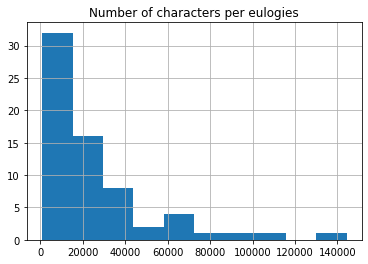

In [23]:
df['Eloge'].str.len().hist()
plt.title('Number of characters per eulogies')

### 2. Through the years

In [34]:
df['Number of characters'] = df['Eloge'].apply(lambda x : len(str(x)))

nbr_charac = df.groupby(['Annee']).agg({'Number of characters' : 'mean'}).reset_index()


In [35]:
nbr_charac.head(2)

,Annee,Number of characters
0,1771,26239.00
1,1773,7753.96


Text(0.5, 1.0, 'Evolution of number of characters through the years')

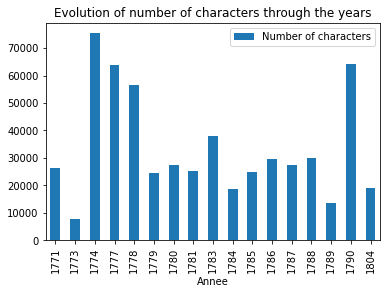

In [38]:
nbr_of_years = max(df.Annee)-min(df.Annee)

nbr_charac.plot(x= 'Annee', y = 'Number of characters', kind = 'bar')
plt.title('Evolution of number of characters through the years')

## b. Number of words per eulogy

### 1. Generally

Text(0, 0.5, 'Number of eulogies')

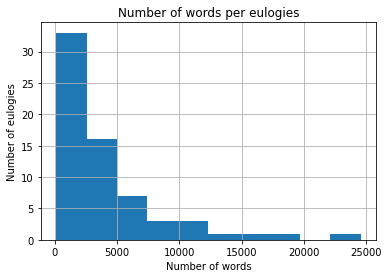

In [39]:
df['Eloge'].str.split().map(lambda x : len(x)).hist()
plt.title('Number of words per eulogies')
plt.xlabel('Number of words')
plt.ylabel('Number of eulogies')

### 2. Through the years

<AxesSubplot:xlabel='Annee'>

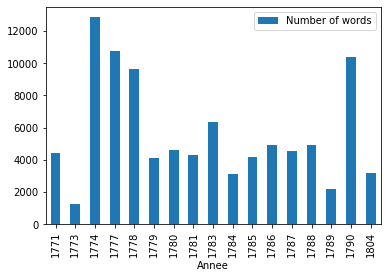

In [42]:
df['Number of words'] = df['Eloge'].apply(lambda x : len(x.split()))

nbr_words = df.groupby(['Annee']).agg({'Number of words' : 'mean'}).reset_index()

nbr_words.plot(x = 'Annee', y = 'Number of words', kind = 'bar')

Both graphs of the evolution though time of number of characters and of number of words per eulogy look-alike. From 1774 to 1778 and in 1790, the eulogies are on average longer. While from 1779 to 1788, they are roughly of the same length. In 1773 and in 1789 they are significantly smaller

In [44]:
df[(df['Annee']==1773) | (df['Annee']==1789)]

,Savant,Auteur,Annee,Eloge,Side_Info,Number of characters,Number of words
0,de la Chambre,Condorcet,1773,"Marin Cureau de la Chambre, médecin ordinaire ...","[Condorcet avait mis, en marge de cette premiè...",15356,2538
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...","[Il y a, dit-on, quelques pièces licencieuses ...",4965,793
2,Picard,Condorcet,1773,L’abbé Picard naquit dans un temps où Kepler e...,[Voyez sur Picard l’Histoire céleste. Il a sou...,10969,1801
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",[Savoir si ce que je dis ici de la ville de Di...,14955,2478
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[],9344,1564
5,Blondel,Condorcet,1773,"François Blondel naquit à Ribemont, en Picardi...",[Voltaire doit servir de réponse à ceux qui di...,22358,3743
6,Huygens,Condorcet,1773,"Christian Huygens naquit à la Haye, le 14 avri...",[Ajouter ce qu'il a fait sur les fractions con...,25931,4337
7,Charas,Condorcet,1773,"Moïse Charas naquit à Usez vers 1618, d’une fa...",[],5836,965
8,Roëmer,Condorcet,1773,Souvent l’observation d’un phénomène suffit po...,"[Voyez le Recueil des œuvres de Leibniz, par M...",21992,3632
9,Rohaut,Condorcet,1773,"Au sortir du collège, où l’on n’enseignait enc...",[],2271,378


## c. Average word length

### 1. Generally

Text(0.5, 1.0, 'Average word length in the eulogies')

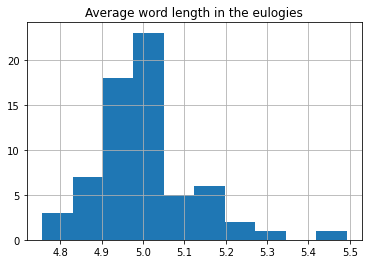

In [45]:
df['Eloge'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist()
plt.title('Average word length in the eulogies')

### 2. Through the years

In [47]:
import statistics

df['Avg Word Length'] = df['Eloge'].apply(lambda x : statistics.mean([len(i) for i in x.split()]))

Text(0.5, 1.0, 'Evolution of the average word length')

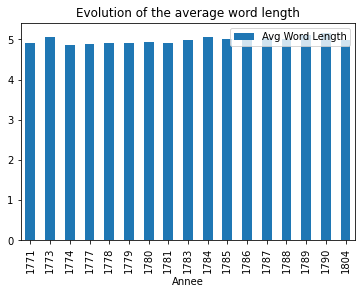

In [49]:
avg_word = df.groupby(['Annee']).agg({'Avg Word Length' : 'mean'}).reset_index()

avg_word.plot('Annee', 'Avg Word Length', kind = 'bar')

plt.title('Evolution of the average word length')

The average word length stays the same through the years.

## d. Average sentence length

### 1. Generally

In [50]:
#https://onecompiler.com/python/3wrds77az

#function to calculate the average sentence length across a piece of text.
def avg_sentence_len(text):
    sentences = text.split(".") #split the text into a list of sentences.
    words = text.split(" ") #split the input text into a list of separate words
    if(sentences[len(sentences)-1]==""): #if the last value in sentences is an empty string
        average_sentence_length = len(words) / len(sentences)-1
    else:
        average_sentence_length = len(words) / len(sentences)
    return average_sentence_length #returning avg length of sentence

Text(0.5, 1.0, 'Average length of the sentences in the eulogies')

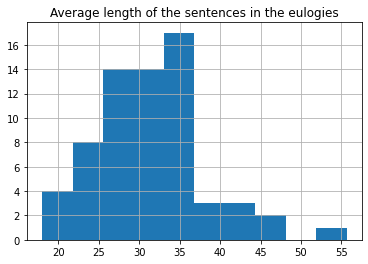

In [51]:
df['Eloge'].apply(lambda x : avg_sentence_len(x)).hist()
plt.title('Average length of the sentences in the eulogies')

### 2. Through the years

Text(0.5, 1.0, 'Evolution of the sentence length through the years')

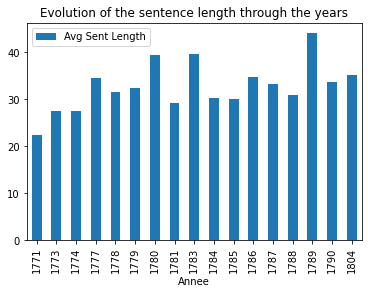

In [52]:
df['Avg Sent Length'] = df['Eloge'].apply(lambda x : avg_sentence_len(x))

avg_sent = df.groupby(['Annee']).agg({'Avg Sent Length' : 'mean'}).reset_index()

avg_sent.plot('Annee', 'Avg Sent Length', kind = 'bar')
plt.title('Evolution of the sentence length through the years')

The average word length stays between 28 and 32 words except for the years 1780, 1781, 1789.

# 5. Removing stop-words

In [53]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clemencebarsi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('french'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    plt.title('Most appearing stop words')
    plt.xlabel('Stop words')
    plt.ylabel('Number of apparitions')

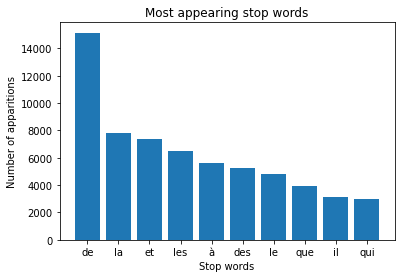

In [57]:
plot_top_stopwords_barchart(df['Eloge'])

In [58]:
def remove_sw(string, stop = stop) :
    string_sp = string.split()
    no_sw = [s for s in string_sp if s not in stop]
    return ' '.join(no_sw)


df['no_sw'] = df['Eloge'].apply(lambda x : remove_sw(x))

In [59]:
df.head()

,Savant,Auteur,Annee,Eloge,Side_Info,Number of characters,Number of words,Avg Word Length,Avg Sent Length,no_sw
0,de la Chambre,Condorcet,1773,"Marin Cureau de la Chambre, médecin ordinaire ...","[Condorcet avait mis, en marge de cette premiè...",15356,2538,5.041371,30.629630,"Marin Cureau Chambre, médecin ordinaire roi, n..."
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...","[Il y a, dit-on, quelques pièces licencieuses ...",4965,793,5.252207,24.838710,"Nicolas Frenicle Bessy, conseiller cour monnai..."
2,Picard,Condorcet,1773,L’abbé Picard naquit dans un temps où Kepler e...,[Voyez sur Picard l’Histoire céleste. Il a sou...,10969,1801,5.082177,26.119403,L’abbé Picard naquit temps où Kepler Galilée v...
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",[Savoir si ce que je dis ici de la ville de Di...,14955,2478,5.029459,31.802632,"Edme Mariotte naquit Dijon, moins passa partie..."
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[],9344,1564,4.964834,34.909091,"Samuel Cotreau Duclos, médecin ordinaire roi, ..."


# 6. Top N-grams

## a. With stop-words

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
#https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

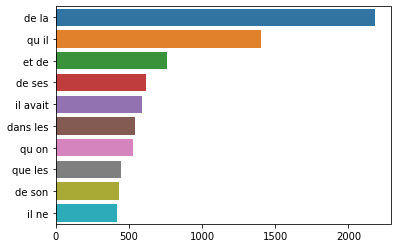

In [62]:
top_n_bigrams=get_top_ngram(df['Eloge'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

## b. Without stop-words

<AxesSubplot:>

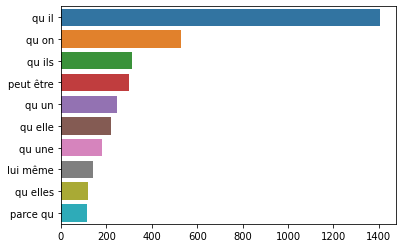

In [63]:
top_n_bigrams=get_top_ngram(df['no_sw'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

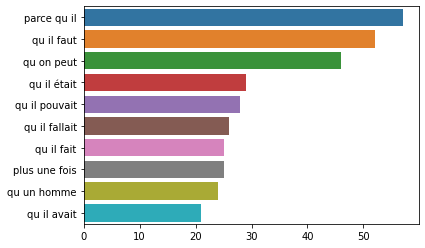

In [64]:
top_n_bigrams=get_top_ngram(df['no_sw'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

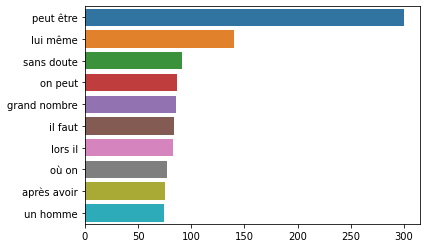

In [65]:
df['no_sw_no_qu'] = df['no_sw'].apply(lambda x : x.replace('qu', ''))
top_n_bigrams=get_top_ngram(df['no_sw_no_qu'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

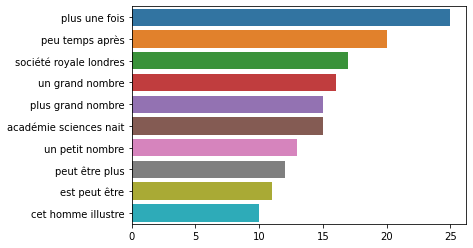

In [66]:
df['no_sw_no_qu'] = df['no_sw'].apply(lambda x : x.replace('qu', ''))
top_n_bigrams=get_top_ngram(df['no_sw_no_qu'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

# 7. Topic Modelling

In [67]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['Eloge']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/clemencebarsi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/clemencebarsi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [69]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.014*"plus" + 0.008*"cette" + 0.006*"comme" + 0.006*"dont" + 0.005*"science" + 0.005*"être" + 0.004*"hommes" + 0.004*"avoir" + 0.004*"sans" + 0.004*"encore"'),
 (1,
  '0.013*"plus" + 0.007*"cette" + 0.005*"comme" + 0.005*"être" + 0.005*"sans" + 0.005*"dont" + 0.005*"leurs" + 0.004*"hommes" + 0.004*"avoir" + 0.004*"homme"'),
 (2,
  '0.013*"plus" + 0.006*"cette" + 0.005*"comme" + 0.004*"leurs" + 0.004*"dont" + 0.004*"être" + 0.004*"science" + 0.003*"sans" + 0.003*"hommes" + 0.003*"tous"'),
 (3,
  '0.012*"plus" + 0.006*"cette" + 0.006*"Condamine" + 0.005*"sans" + 0.004*"être" + 0.004*"dont" + 0.004*"faire" + 0.004*"comme" + 0.003*"avoir" + 0.003*"temp"')]

In [70]:
corpus_pre = preprocess_news(df[df['Annee']<1776])
corpus_pre_rev = preprocess_news(df[(df['Annee']<1789) & (df['Annee']>=1776)])
corpus_rev = preprocess_news(df[df['Annee']>=1789])

In [71]:
dic_pre=gensim.corpora.Dictionary(corpus_pre)
bow_corpus_pre = [dic_pre.doc2bow(doc) for doc in corpus_pre]

dic_pre_rev=gensim.corpora.Dictionary(corpus_pre_rev)
bow_corpus_pre_rev = [dic_pre_rev.doc2bow(doc) for doc in corpus_pre_rev]

dic_rev=gensim.corpora.Dictionary(corpus_rev)
bow_corpus_rev = [dic_rev.doc2bow(doc) for doc in corpus_rev]

In [72]:
lda_model = gensim.models.LdaMulticore(bow_corpus_pre, 
                                   num_topics = 3, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.010*"plus" + 0.009*"Condamine" + 0.005*"cette" + 0.004*"dont" + 0.003*"sans" + 0.003*"faire" + 0.003*"encore" + 0.003*"comme" + 0.003*"être" + 0.003*"hommes"'),
 (1,
  '0.011*"plus" + 0.006*"cette" + 0.005*"dont" + 0.005*"comme" + 0.004*"être" + 0.004*"avoir" + 0.004*"hommes" + 0.003*"point" + 0.003*"temp" + 0.003*"deux"'),
 (2,
  '0.004*"plus" + 0.002*"chimie" + 0.002*"animaux" + 0.002*"encore" + 0.002*"Charas" + 0.002*"leurs" + 0.002*"Frenicle" + 0.002*"hommes" + 0.002*"expériences" + 0.001*"principe"')]

In [73]:
lda_model = gensim.models.LdaMulticore(bow_corpus_pre_rev, 
                                   num_topics = 3, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.014*"importants" + 0.008*"dit-il" + 0.006*"médliocres" + 0.005*"comparer" + 0.005*"ennemi" + 0.004*"circonspection" + 0.004*"Duclos" + 0.004*"vitesse" + 0.004*"contagion" + 0.004*"lesquelles"'),
 (1,
  '0.001*"baissait" + 0.001*"importants" + 0.000*"dit-il" + 0.000*"vitesse" + 0.000*"Duclos" + 0.000*"ennemi" + 0.000*"comparer" + 0.000*"physique" + 0.000*"division" + 0.000*"vit"'),
 (2,
  '0.013*"importants" + 0.007*"dit-il" + 0.006*"ennemi" + 0.006*"Duclos" + 0.004*"circonspection" + 0.004*"médliocres" + 0.004*"vit" + 0.004*"comparer" + 0.004*"lesquelles" + 0.004*"vitesse"')]

In [74]:
lda_model = gensim.models.LdaMulticore(bow_corpus_rev, 
                                   num_topics = 3, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.002*"emplois" + 0.001*"repaissaient" + 0.001*"découvrit" + 0.001*"mort" + 0.001*"médecine" + 0.001*"autrui" + 0.001*"courtisans" + 0.001*"peau" + 0.001*"compliquée" + 0.001*"bannissant"'),
 (1,
  '0.009*"négliger" + 0.005*"praticiens" + 0.005*"médecine" + 0.004*"irriter" + 0.003*"courtisans" + 0.003*"trompés" + 0.003*"retire" + 0.003*"Richelieu" + 0.003*"mur" + 0.003*"première"'),
 (2,
  '0.000*"négliger" + 0.000*"praticiens" + 0.000*"médecine" + 0.000*"irriter" + 0.000*"trompés" + 0.000*"courtisans" + 0.000*"retire" + 0.000*"première" + 0.000*"mur" + 0.000*"changer"')]

# 8. WordClouds

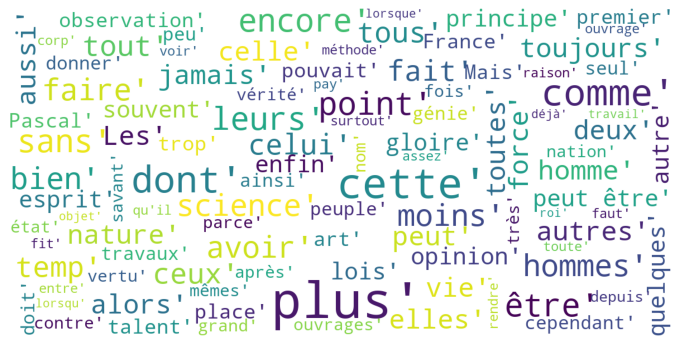

In [75]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

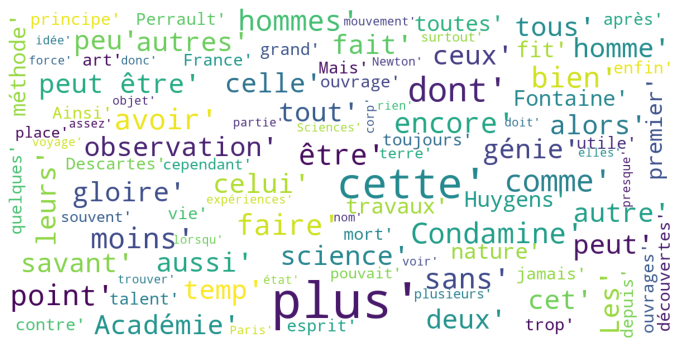

In [76]:
show_wordcloud(corpus_pre)

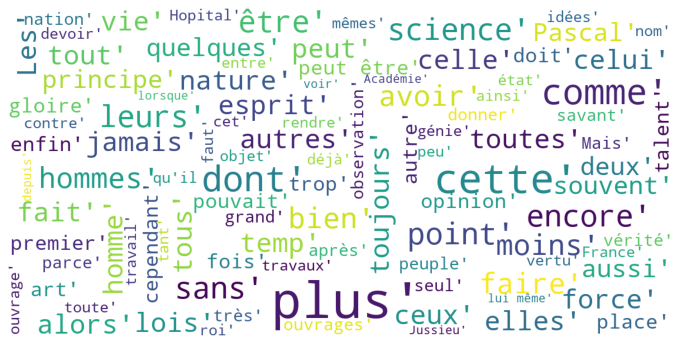

In [77]:
show_wordcloud(corpus_pre_rev)

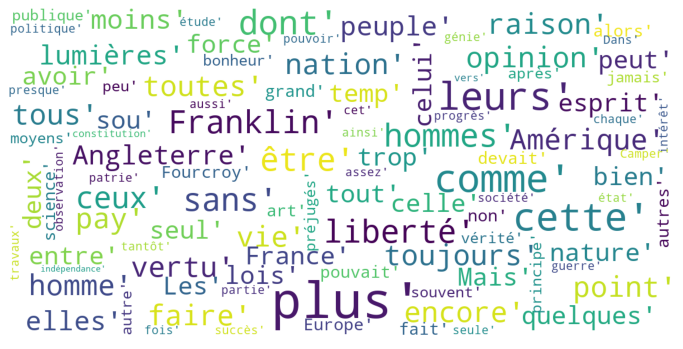

In [78]:
show_wordcloud(corpus_rev)

# 9. TextBlob

- polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

- subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].

## a. Polarity

In [60]:
from textblob import TextBlob

Text(0.5, 1.0, 'Histogram of polarity though the whole corpus')

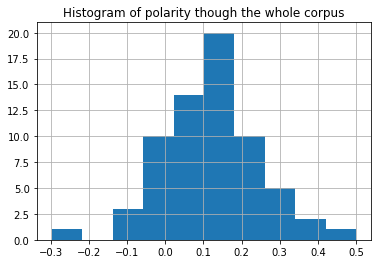

In [61]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['Eloge'].apply(lambda x : polarity(x))
df['polarity_score'].hist()

plt.title('Histogram of polarity though the whole corpus')

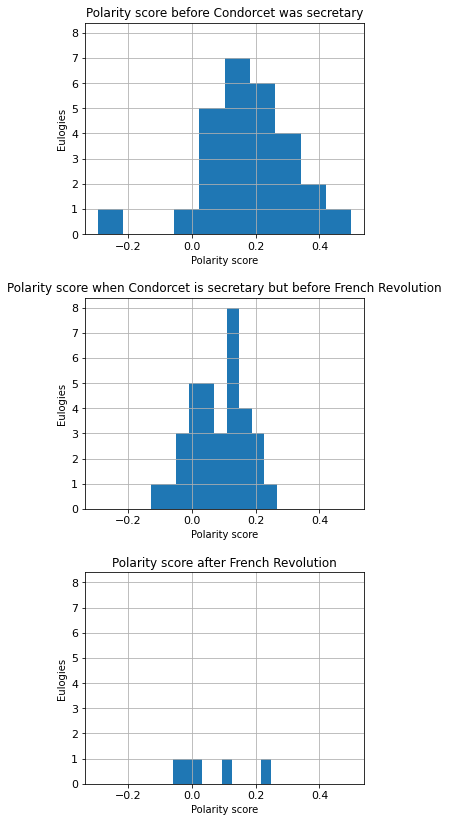

In [62]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 14), sharex = True, sharey = True)

df[df['Annee']<1776]['polarity_score'].hist(ax = axs[0])
df[(df['Annee']>=1776) & (df['Annee']<1789)]['polarity_score'].hist(ax = axs[1])
df[df['Annee']>=1789]['polarity_score'].hist(ax = axs[2])


for i in range(3):
    axs[i].tick_params(axis='both', which='both', labelsize=11, labelbottom=True)
    axs[i].set_xlabel('Polarity score')
    axs[i].set_ylabel('Eulogies')
    
axs[0].set_title('Polarity score before Condorcet was secretary')
axs[1].set_title('Polarity score when Condorcet is secretary but before French Revolution')
axs[2].set_title('Polarity score after French Revolution')

plt.subplots_adjust(hspace=0.3)

## b. Subjectivity

Text(0.5, 1.0, 'Histogram of subjectivity though the whole corpus')

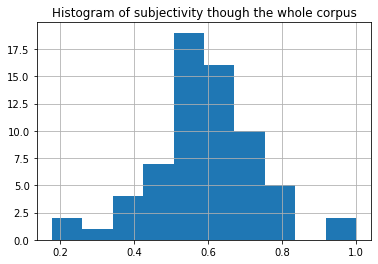

In [63]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df['subjectivity_score']=df['Eloge'].apply(lambda x : subjectivity(x))
df['subjectivity_score'].hist()

plt.title('Histogram of subjectivity though the whole corpus')

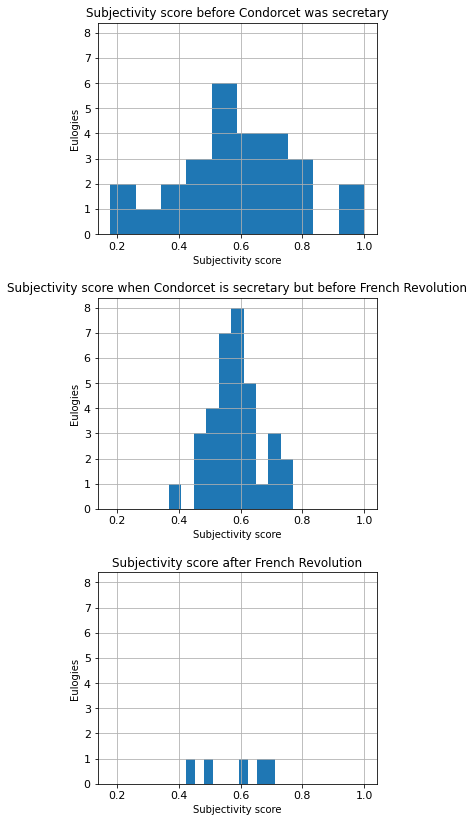

In [64]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 14), sharex = True, sharey = True)

df[df['Annee']<1776]['subjectivity_score'].hist(ax = axs[0])
df[(df['Annee']>=1776) & (df['Annee']<1789)]['subjectivity_score'].hist(ax = axs[1])
df[df['Annee']>=1789]['subjectivity_score'].hist(ax = axs[2])


for i in range(3):
    axs[i].tick_params(axis='both', which='both', labelsize=11, labelbottom=True)
    axs[i].set_xlabel('Subjectivity score')
    axs[i].set_ylabel('Eulogies')
    
axs[0].set_title('Subjectivity score before Condorcet was secretary')
axs[1].set_title('Subjectivity score when Condorcet is secretary but before French Revolution')
axs[2].set_title('Subjectivity score after French Revolution')

plt.subplots_adjust(hspace=0.3)

# 10. Named Entity Recognition

In [65]:
import spacy
from spacy import displacy

NER = spacy.load("fr_core_news_sm")

In [66]:
def calc_freq(ner):
    dict_count = {}
    for word in ner.ents:
        if word.label_ in dict_count.keys():
            dict_count[word.label_] +=1
        else :
            dict_count[word.label_] = 1
    return dict_count

In [67]:
df['NER'] = df['Eloge'].apply(lambda x : calc_freq(NER(x)))
df['NER_list'] = df['Eloge'].apply(lambda x: NER(x).ents)

In [71]:
df = pd.concat([df, df['NER'].apply(pd.Series)], axis=1)

In [72]:
df.head()

,Savant,Auteur,Annee,Eloge,Side_Info,no_sw,no_sw_no_qu,polarity_score,subjectivity_score,NER,NER_list,PER,LOC,ORG,MISC
0,de la Chambre,Condorcet,1773,"Marin Cureau de la Chambre, médecin ordinaire ...","[Condorcet avait mis, en marge de cette premiè...","Marin Cureau Chambre, médecin ordinaire roi, n...","Marin Cureau Chambre, médecin ordinaire roi, n...",0.301923,0.595238,"{'PER': 100, 'LOC': 21, 'ORG': 14, 'MISC': 29}","((Marin, Cureau), (au, Mans), (Séguier), (Cham...",100.0,21.0,14.0,29.0
1,Frenicle,Condorcet,1773,"Nicolas Frenicle de Bessy, conseiller à la cou...","[Il y a, dit-on, quelques pièces licencieuses ...","Nicolas Frenicle Bessy, conseiller cour monnai...","Nicolas Frenicle Bessy, conseiller cour monnai...",0.166667,0.452381,"{'PER': 27, 'MISC': 3, 'LOC': 3, 'ORG': 3}","((Nicolas, Frenicle, de, Bessy), (Ils, n’), (n...",27.0,3.0,3.0,3.0
2,Picard,Condorcet,1773,L’abbé Picard naquit dans un temps où Kepler e...,[Voyez sur Picard l’Histoire céleste. Il a sou...,L’abbé Picard naquit temps où Kepler Galilée v...,L’abbé Picard nait temps où Kepler Galilée ven...,0.244444,0.962963,"{'PER': 47, 'MISC': 13, 'ORG': 10, 'LOC': 29}","((L’, abbé), (Kepler), (Galilée), (l’, abbé, P...",47.0,29.0,10.0,13.0
3,Mariotte,Condorcet,1773,"Edme Mariotte naquit à Dijon, ou du moins il y...",[Savoir si ce que je dis ici de la ville de Di...,"Edme Mariotte naquit Dijon, moins passa partie...","Edme Mariotte nait Dijon, moins passa partie v...",0.201557,0.488645,"{'LOC': 11, 'PER': 47, 'MISC': 24, 'ORG': 16}","((Dijon), (C’), (Dijon), (n’), (Mariotte), (D’...",47.0,11.0,16.0,24.0
4,Duclos,Condorcet,1773,"Samuel Cotreau Duclos, médecin ordinaire du ro...",[],"Samuel Cotreau Duclos, médecin ordinaire roi, ...","Samuel Cotreau Duclos, médecin ordinaire roi, ...",-0.296667,0.613333,"{'ORG': 13, 'MISC': 12, 'PER': 20, 'LOC': 11}","((l’, ancienne), (Académie), (C’), (Descartes)...",20.0,11.0,13.0,12.0


<AxesSubplot:>

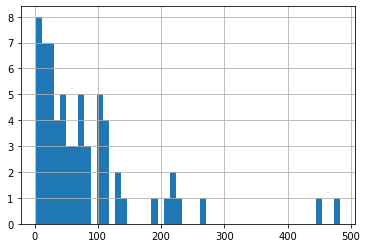

In [76]:
df['PER'].hist(bins = 50)

In [77]:
df['PER_norm'] = df.apply(lambda x : x['PER']/len(x['no_sw'].split()), axis = 1)

<AxesSubplot:>

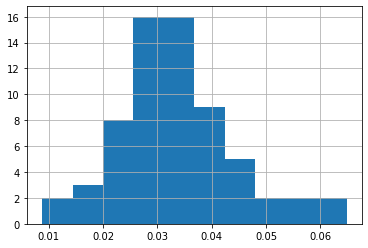

In [78]:
df['PER_norm'].hist()

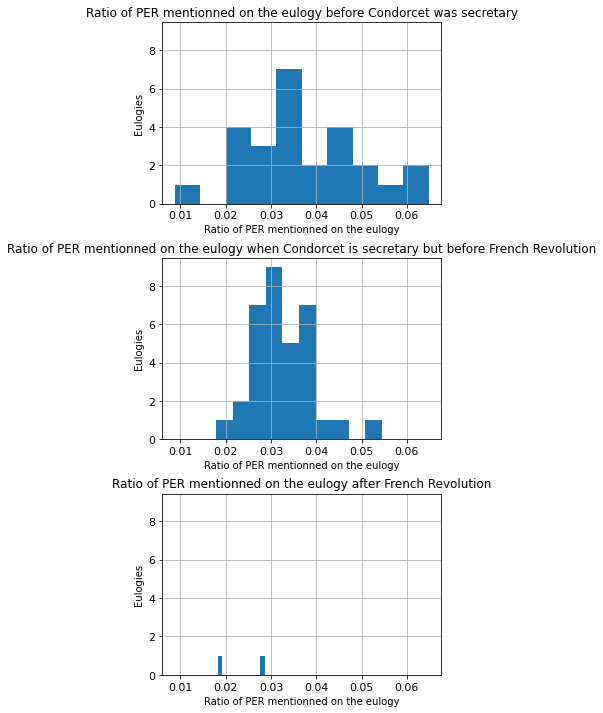

In [79]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 12), sharex = True, sharey = True)

df[df['Annee']<1776]['PER_norm'].hist(ax = axs[0])
df[(df['Annee']>=1776) & (df['Annee']<1789)]['PER_norm'].hist(ax = axs[1])
df[df['Annee']>1789]['PER_norm'].hist(ax = axs[2])

for i in range(3):
    axs[i].tick_params(axis='both', which='both', labelsize=11, labelbottom=True)
    axs[i].set_xlabel('Ratio of PER mentionned on the eulogy')
    axs[i].set_ylabel('Eulogies')
    
axs[0].set_title('Ratio of PER mentionned on the eulogy before Condorcet was secretary')
axs[1].set_title('Ratio of PER mentionned on the eulogy when Condorcet is secretary but before French Revolution')
axs[2].set_title('Ratio of PER mentionned on the eulogy after French Revolution')

plt.subplots_adjust(hspace=0.3)

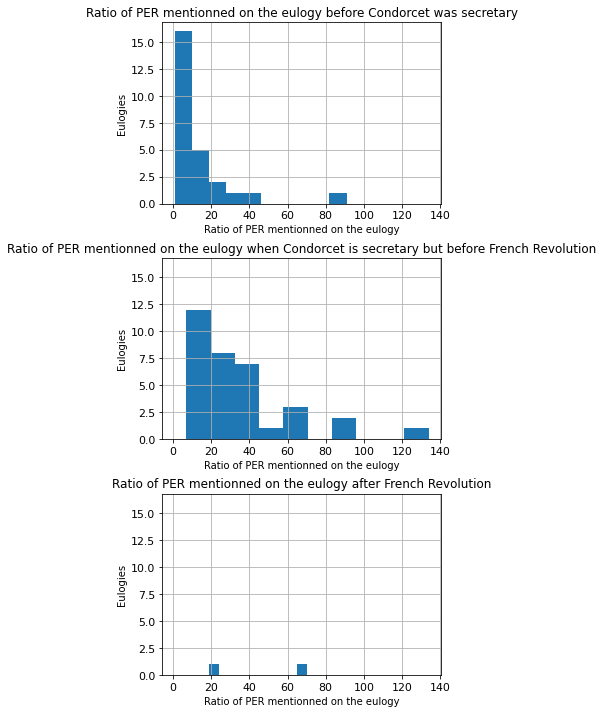

In [80]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 12), sharex = True, sharey = True)

df[df['Annee']<1776]['ORG'].hist(ax = axs[0])
df[(df['Annee']>=1776) & (df['Annee']<1789)]['ORG'].hist(ax = axs[1])
df[df['Annee']>1789]['ORG'].hist(ax = axs[2])

for i in range(3):
    axs[i].tick_params(axis='both', which='both', labelsize=11, labelbottom=True)
    axs[i].set_xlabel('Ratio of PER mentionned on the eulogy')
    axs[i].set_ylabel('Eulogies')
    
axs[0].set_title('Ratio of PER mentionned on the eulogy before Condorcet was secretary')
axs[1].set_title('Ratio of PER mentionned on the eulogy when Condorcet is secretary but before French Revolution')
axs[2].set_title('Ratio of PER mentionned on the eulogy after French Revolution')

plt.subplots_adjust(hspace=0.3)

In [83]:
ners = df[['NER_list']]
ners

,NER_list
0,"((Marin, Cureau), (au, Mans), (Séguier), (Cham..."
1,"((Nicolas, Frenicle, de, Bessy), (Ils, n’), (n..."
2,"((L’, abbé), (Kepler), (Galilée), (l’, abbé, P..."
3,"((Dijon), (C’), (Dijon), (n’), (Mariotte), (D’..."
4,"((l’, ancienne), (Académie), (C’), (Descartes)..."
...,...
61,"((Auguste, Denis, Fougeroux), (l’, Institut, d..."
62,"((l’, ordre, de, Saint-Louis), (Paris), (Charl..."
63,"((François, Turgot), (l’, Académie, des, scien..."
64,"((Chancelier, de, France), (L’, académie), (Du..."


In [85]:
type(ners.loc[0, 'NER_list'])

tuple

In [90]:
dict = {}

for i in range(0,ners.shape[0]):
    for j in ners.loc[i, 'NER_list']:
        if j.text in dict :
            dict[j.text].add(i)
        else :
            dict[j.text] = set()
            dict[j.text].add(i)

In [92]:
dict_count = {} 
for key, value in dict.items():
    dict_count[key] = len(value)

In [93]:
dict_count

{'Marin Cureau': 1,
 'au Mans': 1,
 'Séguier': 2,
 'Chambre': 1,
 'Sciences': 14,
 'n’': 63,
 'cardinal de': 1,
 'Richelieu': 1,
 'Son établissement': 1,
 'livre de Hersant': 1,
 'cour de Rome': 2,
 'France': 35,
 'l’': 62,
 'l’auteur': 2,
 'Rome': 11,
 'l’inquisition': 3,
 'n’avoir point comparu': 1,
 'Cureau': 1,
 'l’Histoire de l’Académie française': 1,
 'Science': 7,
 'Descartes': 20,
 'Pascal': 9,
 'Nouvelles conjectures': 1,
 'Nil': 1,
 'Sur l’amour': 1,
 'l’appareil': 1,
 'Sorbonne': 3,
 'Système de l’âme.': 1,
 's’': 51,
 'Dieu': 10,
 'l’éléphant': 1,
 'Si': 5,
 'c’': 57,
 'Louis XIV': 10,
 'Moreri': 1,
 'l’Histoire de l’Académie': 1,
 'Son ouvrage le bonheur d’échapper': 1,
 'l’envie': 15,
 'Hippocrate': 3,
 'Aristote': 5,
 'C’est': 1,
 'le Seul': 1,
 'l’oubli': 6,
 'l’importance': 2,
 'Saint-Barthélemy': 1,
 'l’Académie française': 7,
 'Éloge de Roberval   ': 1,
 'Gilles Personne': 1,
 'Roberval': 3,
 'Beauvais': 1,
 'Suite': 1,
 'siège de la Rochelle Giège': 1,
 'Paris': 36,

In [100]:
from collections import OrderedDict

d_descending = OrderedDict(sorted(dict_count.items(), key=lambda kv: kv[1], reverse=True))


In [101]:
d_descending

OrderedDict([('n’', 63),
             ('l’', 62),
             ('c’', 57),
             ('s’', 51),
             ('C’', 47),
             ('Paris', 36),
             ('l’Europe', 36),
             ('l’Académie', 36),
             ('France', 35),
             ('M.', 35),
             ('la France', 29),
             ('l’humanité', 24),
             ("qu’'il", 22),
             ('l’Académie des sciences', 21),
             ('Descartes', 20),
             ('Académie', 19),
             ('l’esprit', 18),
             ('l’homme', 18),
             ('Newton', 17),
             ('on n’', 16),
             ('jusqu’', 16),
             ('L’', 16),
             ('l’envie', 15),
             ('l’observation', 15),
             ('l’étude', 15),
             ('Angleterre', 15),
             ('Sciences', 14),
             ('D’ailleurs', 14),
             ('l’ignorance', 14),
             ('S’', 14),
             ('qu’on n’', 14),
             ('Londres', 14),
             ('l’air', 13),
             

In [103]:
for word in ners.loc[0, 'NER_list'] :
    print(word.text,word.label_)

Marin Cureau PER
au Mans LOC
Séguier ORG
Chambre ORG
Sciences ORG
n’ PER
cardinal de PER
Richelieu PER
Son établissement MISC
livre de Hersant MISC
cour de Rome LOC
France LOC
l’ LOC
l’auteur PER
Rome LOC
l’inquisition LOC
n’avoir point comparu MISC
Cureau PER
livre de Hersant MISC
Sciences PER
l’Histoire de l’Académie française MISC
Cureau PER
Science PER
Descartes PER
Pascal PER
France LOC
Nouvelles conjectures MISC
Nil LOC
l’ LOC
Sur l’amour MISC
Richelieu PER
l’appareil ORG
Sorbonne LOC
Chambre ORG
Système de l’âme. MISC
l’ LOC
s’ LOC
Dieu MISC
l’éléphant ORG
Si MISC
c’ MISC
Louis XIV PER
Moreri MISC
l’Histoire de l’Académie MISC
Chambre ORG
Son ouvrage le bonheur d’échapper MISC
l’envie PER
Pascal PER
Descartes PER
Chambre ORG
Hippocrate PER
Aristote PER
n’ PER
C’est PER
le Seul MISC
l’oubli LOC
l’importance ORG
Saint-Barthélemy MISC
l’Académie française ORG
n’ PER
Éloge de Roberval    PER
Gilles Personne PER
Roberval LOC
Beauvais LOC
Suite MISC
Descartes PER
siège de la Rochelle 

# 11. Looking for key words